In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

c:\Users\lukeh\anaconda3\envs\gradschool\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\lukeh\anaconda3\envs\gradschool\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\lukeh\anaconda3\envs\gradschool\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Simulate customer credit scores and income
np.random.seed(42)
num_customers = 1000

# Here the beta distribution A (successs) is assumed to be 5, B (failure) is assumed to be 2
credit_score = np.random.beta(5, 2, size=num_customers)
income_mean = 50000
income_std = 20000
income = np.random.normal(loc=income_mean, scale=income_std, size=num_customers)


In [3]:
# Simulate customer defaults (higher credit score and income reduce default risk)
customer_defaults = (credit_score + income / 50000) / 2 < 0.4


In [4]:

# Define the logistic regression model
with pm.Model() as logistic_model:
    # Priors for the coefficients (assume flat priors)

    # pm.Flat() is a way to specify a "flat" or non-informative prior distribution for a model parameter. 
    # In other words, it represents a prior belief that provides no specific information or bias 
    # about the parameter being estimated. 
    # This is useful when we want to express minimal prior knowledge or 
    # when we want the data to heavily influence the posterior distribution.
    
    beta_0 = pm.Flat('beta_0')
    beta_credit_score = pm.Flat('beta_credit_score')
    beta_income = pm.Flat('beta_income')
    
    # Linear combination of predictors
    logits = beta_0 + beta_credit_score * credit_score + beta_income * income
    
    # Likelihood (Bernoulli distribution for binary outcomes)
    likelihood = pm.Bernoulli('likelihood', p=pm.math.invlogit(logits), observed=customer_defaults)



c:\Users\lukeh\anaconda3\envs\gradschool\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [beta_income, beta_credit_score, beta_0]


Sampling 16 chains for 50 tune and 100 draw iterations (800 + 1_600 draws total) took 10132 seconds.
There were 99 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.92, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.9199995890224467, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or

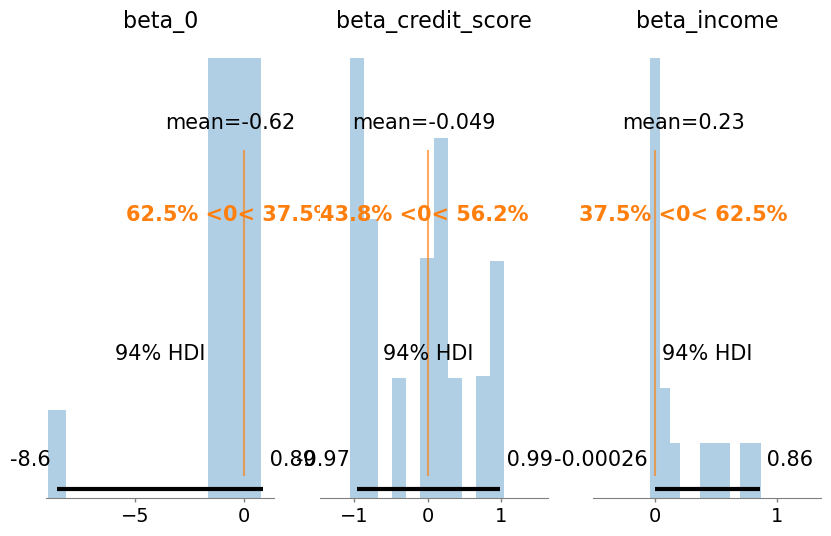

In [5]:
# Fit the model using Markov Chain Monte Carlo (MCMC) sampling
with logistic_model:
    # This function is using MCMC
    trace = pm.sample(100, tune=50, cores=16)

# Plot the posterior distributions of the coefficients
pm.plot_posterior(trace, var_names=['beta_0', 'beta_credit_score', 'beta_income'], 
                   figsize=(10, 6), ref_val=0, kind='hist')
plt.show()